#Zindi Weekendz: Laduma Analytics Football League Winners Prediction Challenge

- **Can you predict the outcome of a football match based on historical data?**

# Downloading all datasets directly from Zindi platform using url:

In [ ]:
import requests, zipfile
# The url and auth_value from the website
myobj = {'auth_token': 'TDJxp4yo9CPeDXiZAh5Kcgy1'} # fill with your token
data_list=['Test.csv','VariableDefinitions.csv','Train.csv','SampleSubmission.csv']
target_dir=''
base_path='https://api.zindi.africa/v1/competitions/laduma-analytics-football-league-winners-prediction-challenge/files/'
def load_zindi_data(data_list,base_path,target_dir):
  for data in data_list:
      target_path=  target_dir +data
      data_path=base_path+ data
      x = requests.post(data_path, data = myobj,stream=True)
      handle = open(target_path, "wb")
      for chunk in x.iter_content(chunk_size=512):
        if chunk:  # filter out keep-alive new chunks
          handle.write(chunk)
      handle.close()
load_zindi_data(data_list,base_path,target_dir)

#### Import Libraries

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from datetime import datetime as dt
import itertools
from tqdm import tqdm
%matplotlib inline

from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification
from sklearn.preprocessing import StandardScaler
pd.set_option('display.max_columns', None)
import warnings
warnings.filterwarnings('ignore')
sns.set(font_scale = 2)

#Load Datasets:

In [ ]:
train = pd.read_csv("Train.csv",parse_dates=['Date'])
test = pd.read_csv("Test.csv",parse_dates=['Date'])

In [ ]:
train.head()

,Date,Season,Match_ID,Game_ID,Home Team,Away Team,Score
0,2017-02-15,1,1.0,ID_KAG4KAE9,Antennae,Andromeda,Away win
1,2016-09-14,1,12.0,ID_T7H1XN5Z,Andromeda,Antennae,Draw
2,2016-12-12,1,13.0,ID_O1P9FGN4,Andromeda,Butterfly,Away win
3,2017-01-25,1,14.0,ID_TR5M4KQV,Andromeda,Cigar,Away win
4,2016-08-24,1,15.0,ID_EOIECRE2,Andromeda,Circinus,Home Win


In [ ]:
train.shape,test.shape

((412, 7), (234, 6))

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

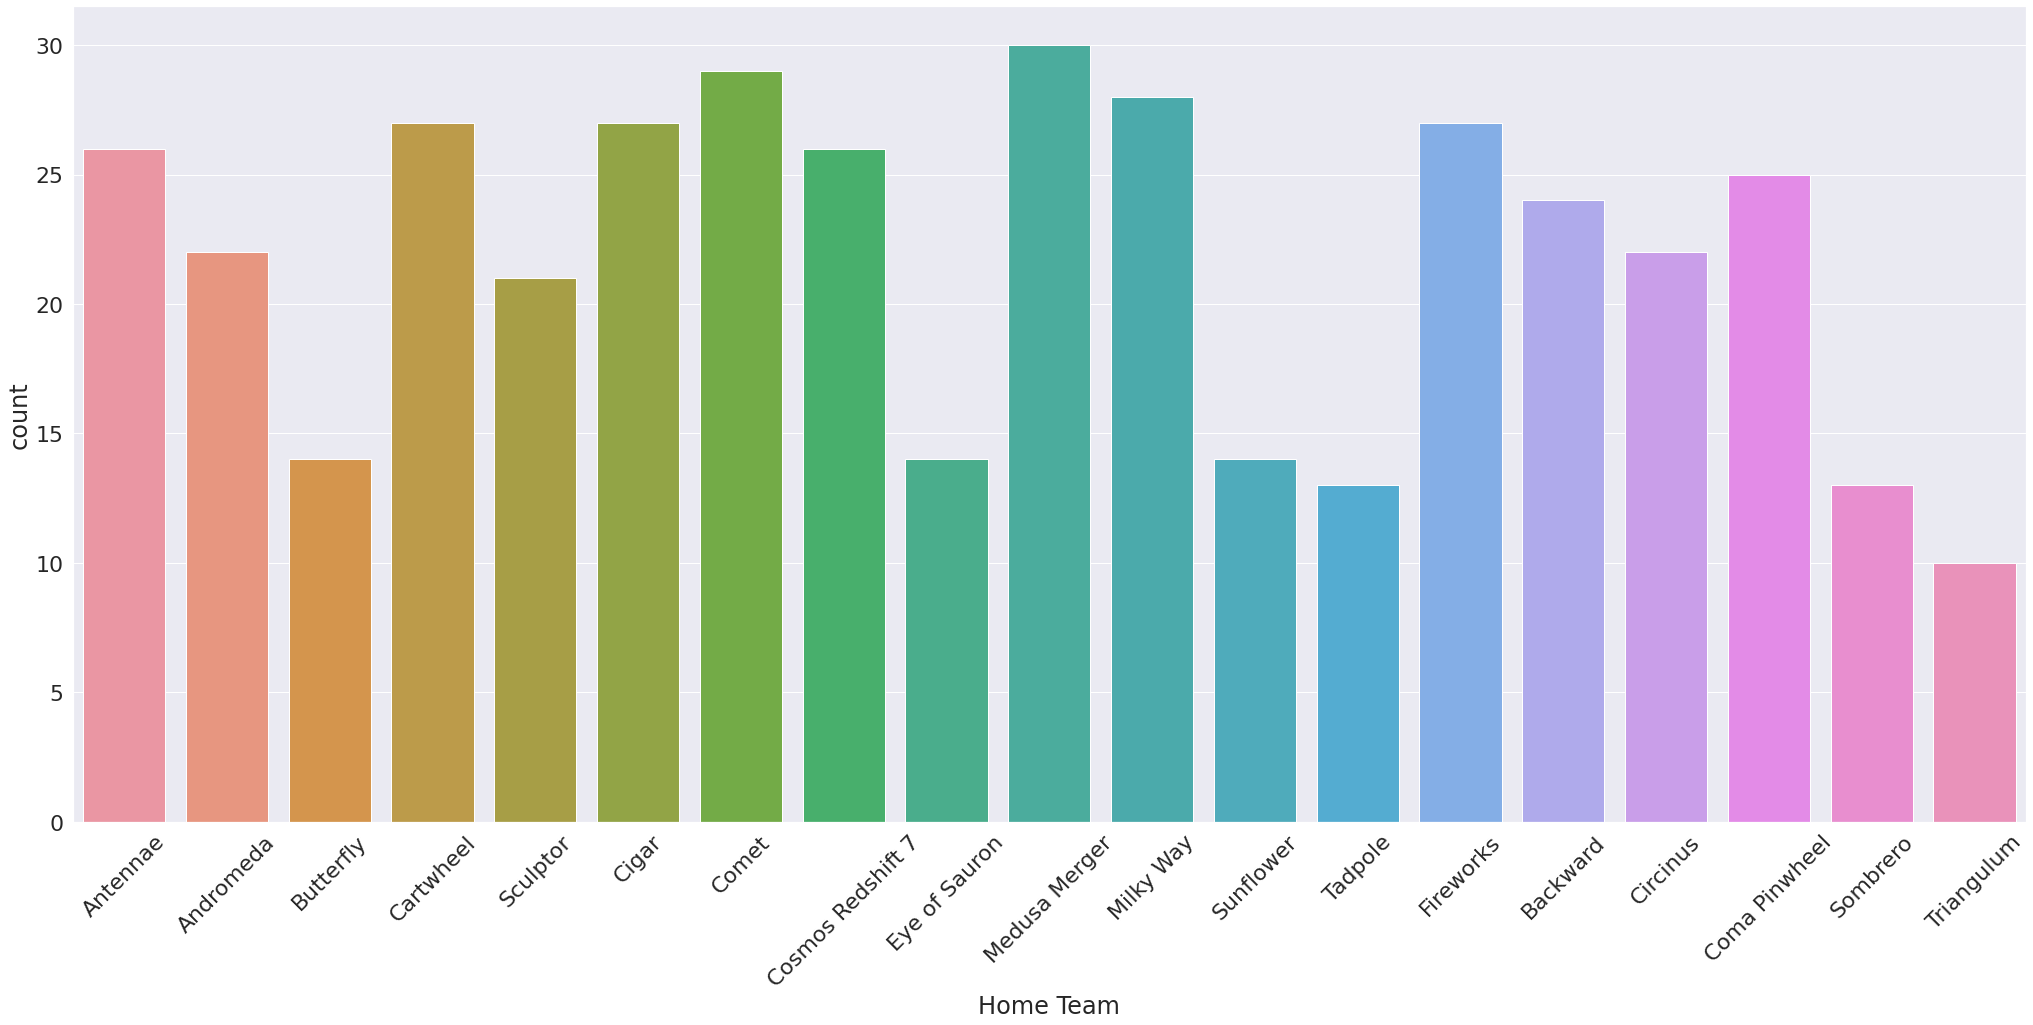

In [ ]:
plt.figure(figsize = (35,15))
sns.countplot(x ='Home Team',data = train )
plt.xticks(rotation = 45)

In [ ]:
train['Home Team'].nunique()

19

In [ ]:
train['Season'].nunique()

2

In [ ]:
train.isna().sum()

Date         0
Season       0
Match_ID     0
Game_ID      0
Home Team    0
Away Team    0
Score        0
dtype: int64

In [ ]:
train['Score'].nunique()

3

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18]), <a list of 19 Text major ticklabel objects>)

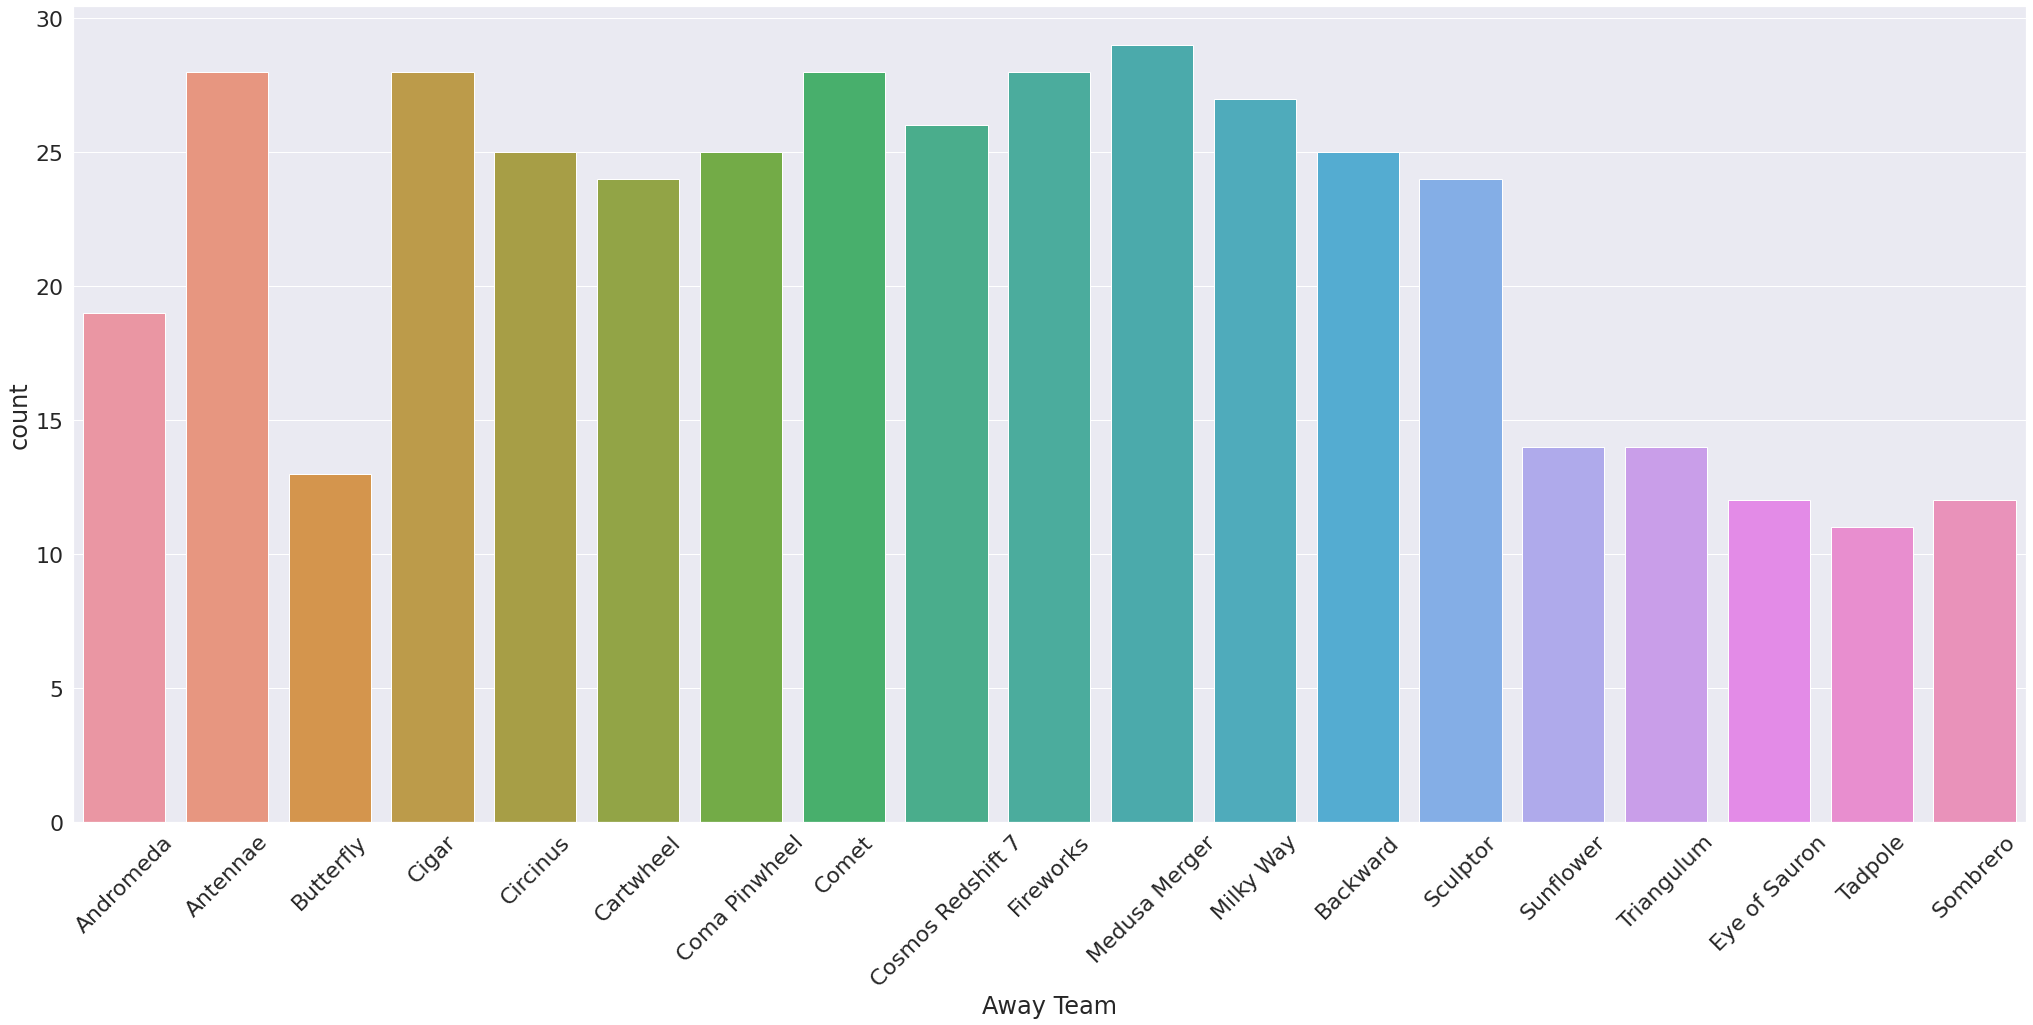

In [ ]:
plt.figure(figsize = (35,15))
sns.countplot(x ='Away Team',data = train )
plt.xticks(rotation = 45)

In [ ]:
train['Away Team'].nunique()

19

In [ ]:
def preprocess(train,test):
  train['Train']=1
  test['Train']=0
  home_teams=train['Home Team'].unique()
  all_data=pd.concat([train,test])
  for team in home_teams:
    all_data['home_'+team]=0
    all_data.loc[all_data['Home Team']==team,'home_'+team]=1
  away_teams=train['Away Team'].unique()
  for team in away_teams:
    all_data['away_'+team]=0
    all_data.loc[all_data['Away Team']==team,'away_'+team]=1
  train_cols = all_data.columns.difference(['Date', 'Season', 'Match_ID', 'Game_ID','Score','Train','Home Team','Away Team'])
  all_data.fillna(all_data.mean(),inplace=True)
  train = all_data[all_data["Train"] == 1]
  test = all_data[all_data["Train"] == 0]
  return train[train_cols],test[train_cols],train['Score'],test['Score']

In [ ]:
le=LabelEncoder()
train["Score"] = le.fit_transform(train["Score"])
score_mapping = dict(zip(le.classes_, range(len(le.classes_))))

In [ ]:
train.sort_values(by=['Date'],inplace=True)

In [ ]:
from sklearn.model_selection import train_test_split
trai,val= train_test_split(train, test_size=0.2,shuffle=False)

In [ ]:
pro_train_X,pro_test_X,pro_train_y,pro_test_y=preprocess(trai,val)

In [ ]:
X,test_data,y,_=preprocess(train,test)

In [ ]:
#importing models
import lightgbm as lgb 
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score,log_loss

In [ ]:
lr=LogisticRegression(C=0.1,max_iter=1000)
lr.fit(pro_train_X,pro_train_y)
#Predictiing on Test Set
y_pred = lr.predict_proba(pro_test_X)
print(log_loss(pro_test_y,y_pred))

1.0837768308417197


In [ ]:
xgb=XGBClassifier(n_estimators=50 , max_depth=4, learning_rate=0.08,colsample_bytree=0.2,
                  random_state=12,subsample=0.8)
xgb.fit(pro_train_X,pro_train_y)
#Predictiing on Test Set
y_pred = xgb.predict_proba(pro_test_X)
print(log_loss(pro_test_y,y_pred))

1.072106945945556


In [ ]:
clf = RandomForestClassifier(n_estimators=120 , random_state=12,max_depth=2,max_features=0.8)
clf.fit(pro_train_X,pro_train_y)
#Predictiing on Test Set
y_pred = clf.predict_proba(pro_test_X)
print(log_loss(pro_test_y,y_pred))

1.0838418513049575


In [ ]:
!pip install -q catboost


     |████████████████████████████████| 76.6 MB 1.2 MB/s 


In [ ]:
from catboost import CatBoostClassifier
from sklearn import svm,neighbors,ensemble
cat  =  CatBoostClassifier(silent = True)

cat.fit(pro_train_X,pro_train_y)
catPreds = cat.predict_proba(pro_test_X)
print(log_loss(pro_test_y,catPreds))

1.3469774112393083


In [ ]:
lr.fit(X,y)
test_predictions  = lr.predict_proba(test_data)

In [ ]:
Test = test.copy()
cols=le.inverse_transform([*range(3)])
Test[cols]= test_predictions

In [ ]:
submit = Test[["Game_ID",'Away win', 'Draw', 'Home Win']]
submit.drop_duplicates(subset = ["Game_ID"], inplace=True)
submit = submit.reset_index(drop=True)
submit.to_csv("submission_lr.csv", index=False)